# Second Harmonic Generation
**by <span style="color:darkgreen">Dmitrii Nabok</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Tejus Rohatgi</span>, <span style="color:darkgreen">Mara Voiculescu</span> & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial you will learn how to initialize and perform calculations of the second order susceptibility tensor with **`exciting`**. As an example, we compute the second-harmonic generation (<b>SHG</b>) spectrum of GaAs.

<div class="alert alert-block alert-warning">

**Table of Contents**

[0. Before Starting](#0)

[1. Second-Harmonic Generation](#1)
    
* [Excercise](#1-1)

[Literature](#3)

</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

As a first step, you may create a running directory for the notebook.


<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Second Harmonic Generation</span>

Copy and paste the following <code><b>exciting</b></code> input data into <b>input.xml</b>.

<span class="SHG_GaAs_INPUT"></span>
```xml
<input>
 
   <title>GaAs SHG</title>
 
   <structure speciespath="$EXCITINGROOT/species">
      <crystal>
         <basevect>5.3435 5.3435 0.0000</basevect>
         <basevect>5.3435 0.0000 5.3435</basevect>
         <basevect>0.0000 5.3435 5.3435</basevect>
      </crystal>
      <species speciesfile="Ga.xml" rmt="2.0">
         <atom coord="0.00 0.00 0.00"/>
      </species>
      <species speciesfile="As.xml" rmt="2.0">
         <atom coord="0.25 0.25 0.25"/>
      </species>
   </structure>
 
   <groundstate
      do="fromscratch"
      rgkmax="7.0"
      ngridk="8 8 8"
      xctype="LDA_PW"
      nempty="10"
      >
   </groundstate>
 
   <properties>
      <momentummatrix/>
      <shg
         wmax="0.3"
         wgrid="400"
         swidth="0.004"
         etol="1.d-4"
         scissor="0.0423"
         tevout="true"
         >
         <chicomp>1 2 3</chicomp>
      </shg>
   </properties>
 
</input>
```

In [8]:
%%bash
mkdir -p shg

In [9]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook

input_str = get_input_xml_from_notebook("04_tutorial_second_harmonic_generation", "SHG_GaAs_INPUT")

# Write out the input as an XML file:
with open('./shg/input.xml', "w") as fid:
    fid.write(input_str)

<strong><span style="color:firebrick">Make sure to set</span> </strong> <code><span style="color:green">$EXCITINGROOT</span></code> to the correct exciting root directory in the speciespath attribute using the command

In [10]:
%%bash
cd shg
python3 -m excitingscripts.setup.excitingroot
cd ../

Please get first familiar with the input parameters related to the <code><span style="color:green">shg</span></code> element. Note that all required components of the second-order susceptibility tensor $\chi^{abc}_{(2)}(-2\omega, \omega, \omega)$ can be specified by adding corresponding <code><span style="color:green">chicomp</span></code> combinations where $a$, $b$, and $c$ stand for the Cartesian indices ($1=x$, $2=y$, $3=z$).

Run <code><b>exciting</b></code> in the usual way.

In [13]:
%%bash
cd shg
time $EXCITINGROOT/bin/exciting_smp &

cd ../


Info(writepmat):
  Momentum matrix elements written to file PMAT.OUT


Info(shg):

  Susceptibility (complex+module) tensor written to CHI_abc.OUT
  Interband contributions written to CHI_INTERx_abc.OUT
  Intraband contributions written to CHI_INTRAx_abc.OUT
  Modulation contributions written to CHI_MOD_abc.OUT
  for components
  a = 1, b = 2, c = 3
  Output energy is in eV



   Elapsed time = 2m29s


As an example, we present results for $\chi^{xyz}_{(2)}(-2\omega, \omega, \omega)$ (which can be found in the output file <b>CHI_123.OUT</b>). Note that this file contains information about the frequency dependence of the real, imaginary, and absolute value of the corresponding tensor component given in the units of $10^{-7}\ esu$. In the literature, one would often find the second-order susceptibility in the units of $nm/V$. Please notice the conversion factor: $1\ nm/V$ = $23.86 \times 10^{-7}\ esu$. For tutorial purposes, the results could be visualized by executing

In [19]:
%%bash
cd shg

#extracting the thetha_k and gamma_k values
awk '{print $1, $2}' CHI_123.OUT > real
awk '{print $1, $3}' CHI_123.OUT > imaginary
awk '{print $1, $4}' CHI_123.OUT > modulus

# PLOT-SHG.py CHI_123.OUT
python3 -m excitingscripts.plot.files -f real imaginary modulus -cy 2 -ll 'Real' 'Imaginary' 'Modulus'  -lx 'Energy [eV]'  -ly '$\chi^{(2)}(-2\omega, \omega, \omega)$ $[10^{-7}\ esu]$' -g 
cd ../

The resulting plot is saved in the file <b>PLOT.png</b>, which should look like the following image:

<figure>
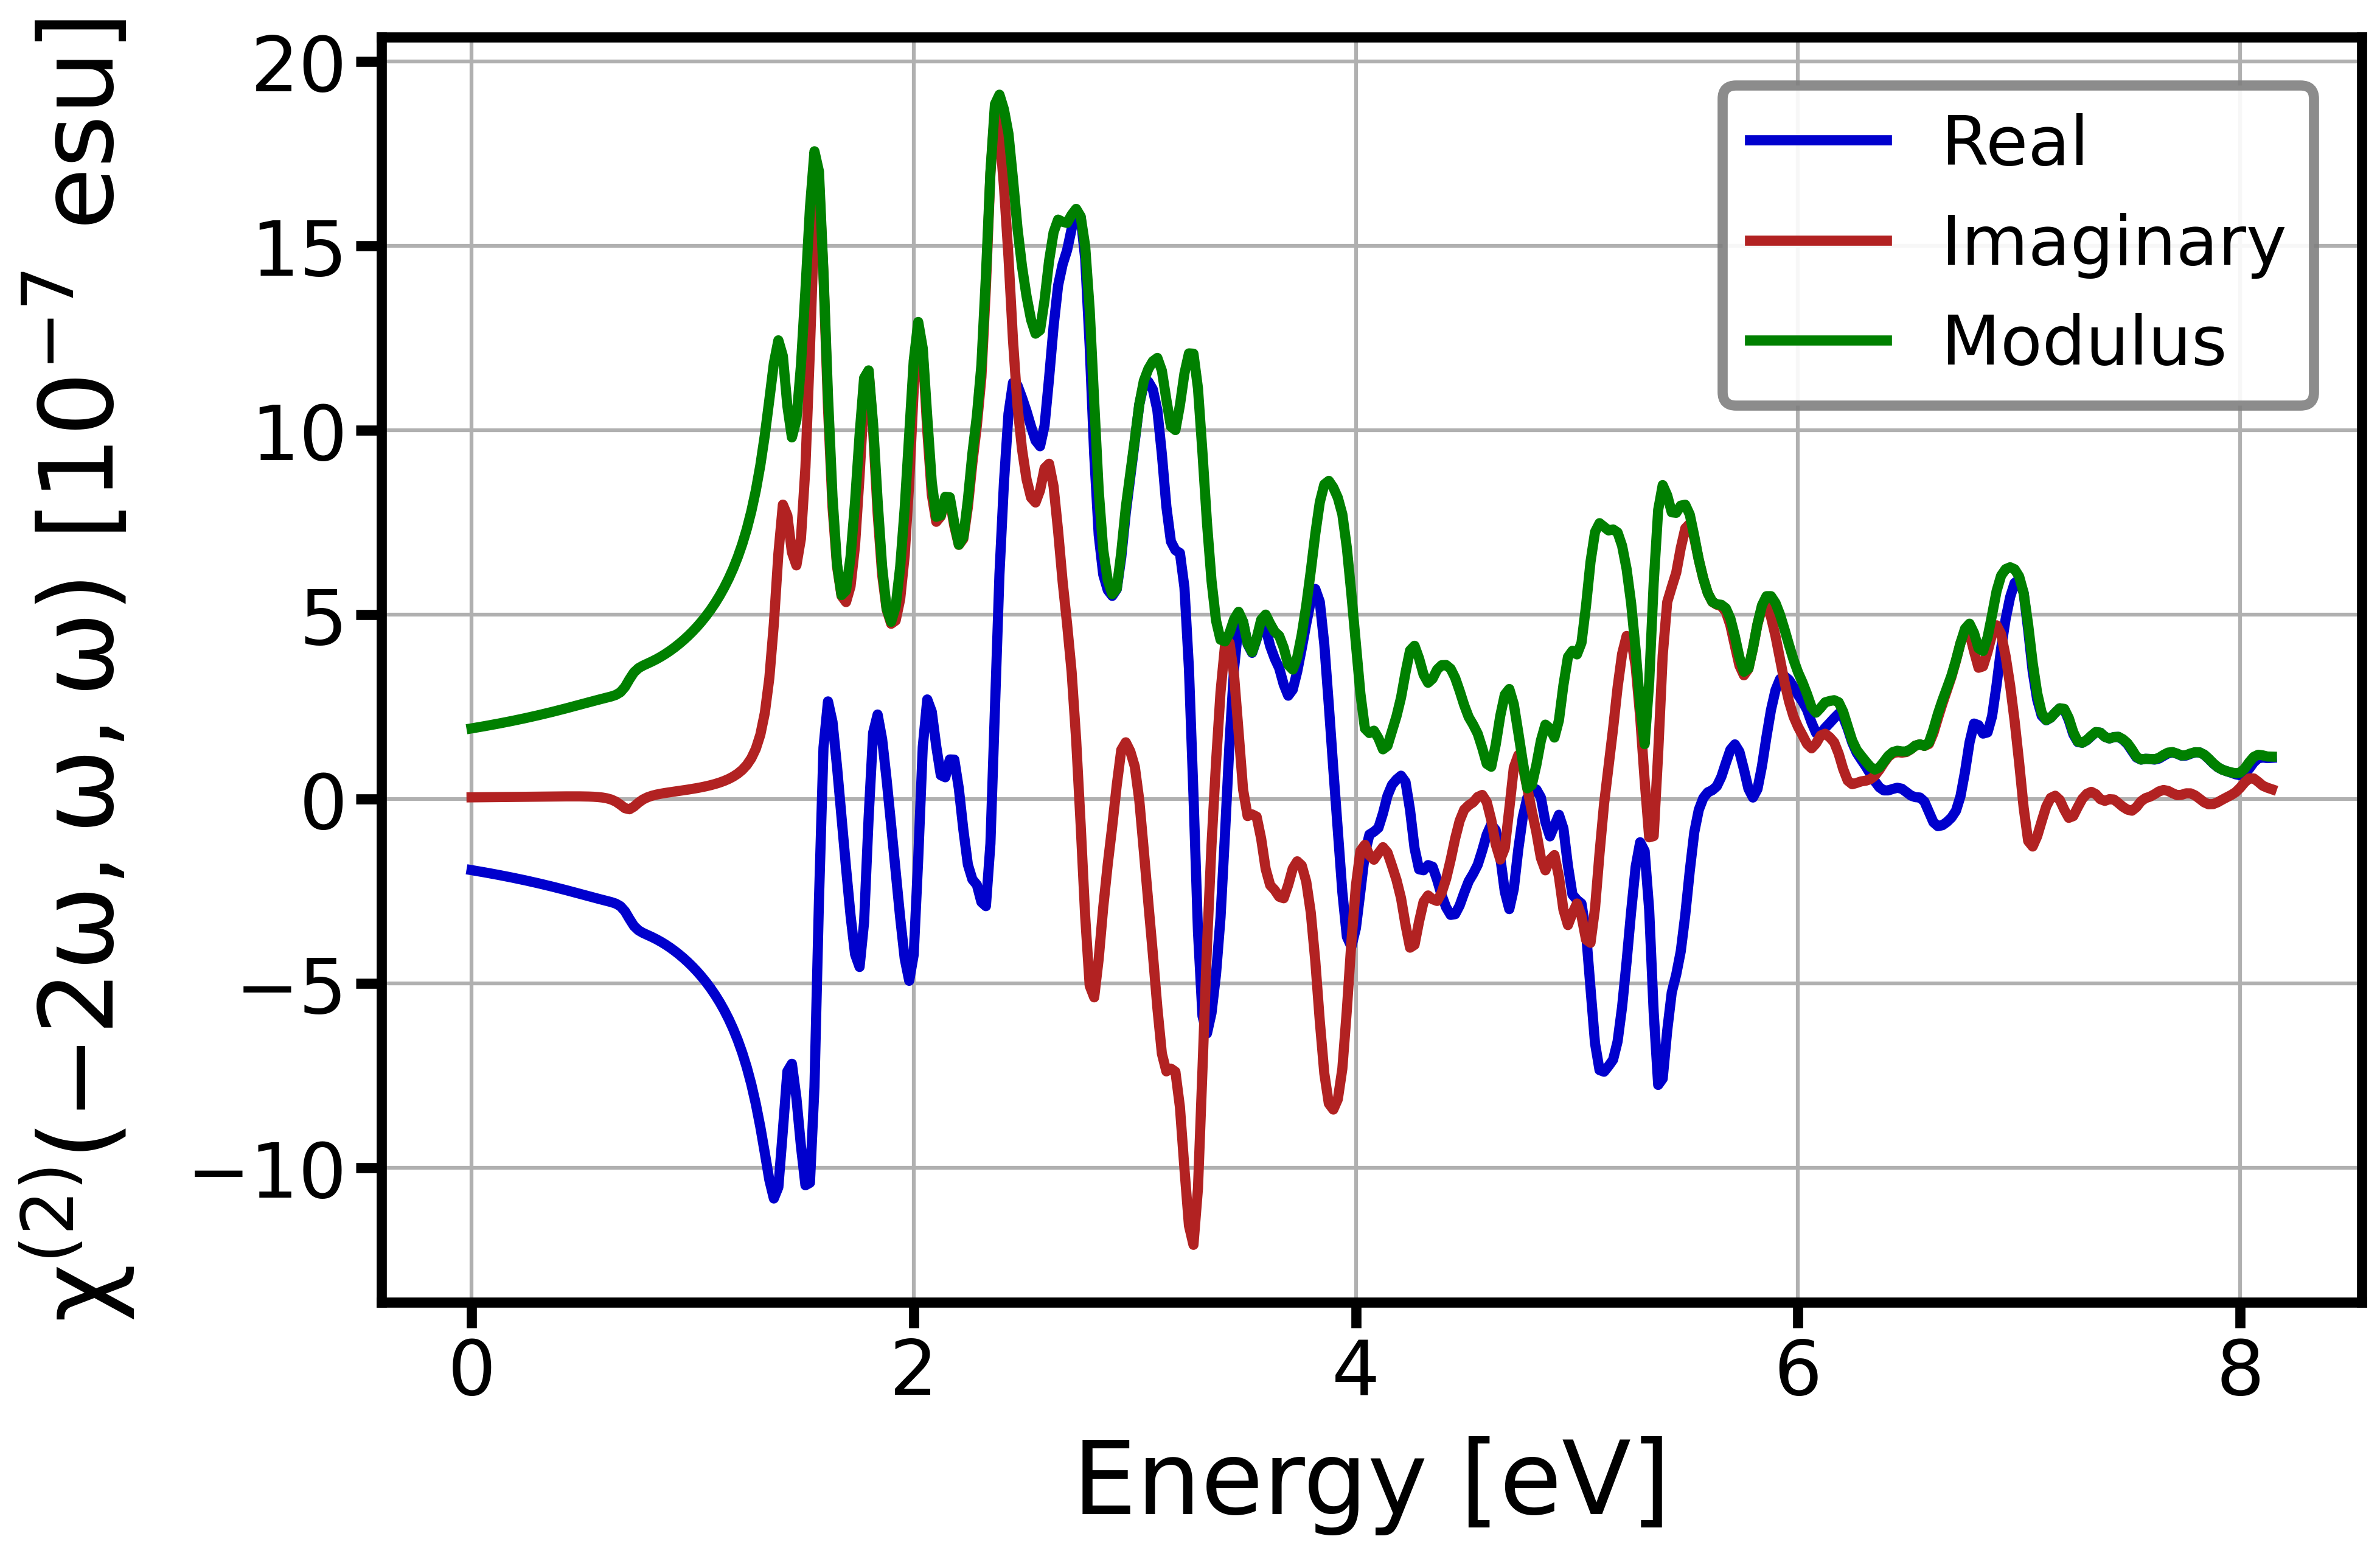
</figure>

<a id='1-1'></a>
<div style="border: 2px solid black; padding: 10px; margin: 10px;">
<span style="color:green"><b>Excercise</b></span>

* Converge the <b>SHG</b> spectrum with respect to <code><span style="color:mediumblue">ngridk</span></code>.
* Try different components of the <b>SHG</b> susceptibility tensor noting that many of them are actually zero due to crystal symmetry.
</div>

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">Literature</span>

* J. L. P. Hughes and J. E. Sipe, Phys. Rev. B <b>53</b>, 10751 (2003)
* S. Bergfeld and W. Daum, Phys. Rev. Lett. <b>90</b>, 036801 (2003)
* S. Sharma and C. Ambrosch-Draxl, Physica Scripta <b>T109</b>, 128 (2004)

<hr style="border:2px solid #DDD"> </hr>